In [109]:
import pandas as pd
import numpy as np       #载入必要的库
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data_phoenix = pd.read_csv('../dataset/Phoenix_category_data.csv', encoding='ISO-8859-1')
data_calgary = pd.read_csv('../dataset/Calgary_category_data.csv', encoding='ISO-8859-1')
data_newyork = pd.read_csv('../dataset/NewYork_category_data.csv', encoding='ISO-8859-1')
data_singapore= pd.read_csv('../dataset/Singapore_category_data.csv', encoding='ISO-8859-1')
print(data_phoenix.shape)
print(data_calgary.shape)
print(data_newyork.shape)
print(data_singapore.shape)
data_phoenix

(7247, 7)
(3013, 7)
(56252, 7)
(33712, 7)


,VenueId,Longitude,Dimension,Category,City,CountryCode,L1_Category
0,413ba880f964a520011c1fe3,33.494307,-112.059703,Rock Club,Phoenix,US,Arts & Entertainment
1,413ba880f964a5200c1c1fe3,33.429753,-111.944480,Bar,Phoenix,US,Nightlife Spot
2,413ba880f964a5200e1b1fe3,33.509136,-112.029283,Resort,Phoenix,US,Travel & Transport
3,413ba880f964a520111c1fe3,33.641348,-112.117624,Pizza Place,Phoenix,US,Food
4,413ba880f964a520131c1fe3,33.538693,-112.064192,Pizza Place,Phoenix,US,Food
...,...,...,...,...,...,...,...
7242,52269e1b11d22a489e0dc3d7,33.495389,-112.021272,Coffee Shop,Phoenix,US,Drink
7243,5229387a11d2ae7da721757d,33.557019,-112.186848,Residential Building (Apartment / Condo),Phoenix,US,Residence
7244,522a02b1498e3faacde032ce,33.448889,-112.078332,Courthouse,Phoenix,US,Professional & Other Places
7245,52348b3a11d21bede302d8ad,33.641171,-112.053730,Housing Development,Phoenix,US,Residence


In [111]:
data_phoenix_category = data_phoenix.groupby('L1_Category').size().sort_values(ascending=False)
data_calgary_category = data_calgary.groupby('L1_Category').size().sort_values(ascending=False)
data_newyork_category = data_newyork.groupby('L1_Category').size().sort_values(ascending=False)
data_singapore_category = data_singapore.groupby('L1_Category').size().sort_values(ascending=False)

In [112]:
data= pd.DataFrame()
data = data.append(data_phoenix_category,ignore_index= True)
data = data.append(data_calgary_category,ignore_index= True)
data = data.append(data_newyork_category,ignore_index= True)
data = data.append(data_singapore_category,ignore_index= True)
data
data_phoenix_category

L1_Category
Shop & Service                 1812
Food                           1714
Professional & Other Places    1177
Travel & Transport              619
Residence                       502
Outdoors & Recreation           477
Nightlife Spot                  367
Arts & Entertainment            270
College & University            158
Drink                           151
dtype: int64

In [113]:
data=data.fillna(0)
data.astype(int)

,Shop & Service,Food,Professional & Other Places,Travel & Transport,Residence,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,College & University,Drink
0,1812,1714,1177,619,502,477,367,270,158,151
1,843,765,330,199,111,224,199,117,47,178
2,10683,14263,8641,5012,3649,4698,3529,3162,1382,1233
3,4912,8211,5171,3456,4633,2003,1133,1197,1929,1067


In [114]:
data.to_csv("Distribution_Capare4City.csv",index=False,sep=',')
data.index = pd.Series(['Phoenix', 'Calgary','NewYork','Singapore'])
data

,Shop & Service,Food,Professional & Other Places,Travel & Transport,Residence,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,College & University,Drink
Phoenix,1812.0,1714.0,1177.0,619.0,502.0,477.0,367.0,270.0,158.0,151.0
Calgary,843.0,765.0,330.0,199.0,111.0,224.0,199.0,117.0,47.0,178.0
NewYork,10683.0,14263.0,8641.0,5012.0,3649.0,4698.0,3529.0,3162.0,1382.0,1233.0
Singapore,4912.0,8211.0,5171.0,3456.0,4633.0,2003.0,1133.0,1197.0,1929.0,1067.0


In [115]:
data = data.stack().unstack(0)
data

,Phoenix,Calgary,NewYork,Singapore
Shop & Service,1812.0,843.0,10683.0,4912.0
Food,1714.0,765.0,14263.0,8211.0
Professional & Other Places,1177.0,330.0,8641.0,5171.0
Travel & Transport,619.0,199.0,5012.0,3456.0
Residence,502.0,111.0,3649.0,4633.0
Outdoors & Recreation,477.0,224.0,4698.0,2003.0
Nightlife Spot,367.0,199.0,3529.0,1133.0
Arts & Entertainment,270.0,117.0,3162.0,1197.0
College & University,158.0,47.0,1382.0,1929.0
Drink,151.0,178.0,1233.0,1067.0


In [116]:
data['Phoenix'] = data['Phoenix'].div(data_phoenix.shape[0])
data['Calgary'] = data['Calgary'].div(data_calgary.shape[0])
data['NewYork'] = data['NewYork'].div(data_newyork.shape[0])
data['Singapore'] = data['Singapore'].div(data_singapore.shape[0])
data

,Phoenix,Calgary,NewYork,Singapore
Shop & Service,0.250034,0.279788,0.189913,0.145705
Food,0.236512,0.253900,0.253555,0.243563
Professional & Other Places,0.162412,0.109525,0.153612,0.153388
Travel & Transport,0.085415,0.066047,0.089099,0.102515
Residence,0.069270,0.036840,0.064869,0.137429
Outdoors & Recreation,0.065820,0.074345,0.083517,0.059415
Nightlife Spot,0.050642,0.066047,0.062736,0.033608
Arts & Entertainment,0.037257,0.038832,0.056211,0.035507
College & University,0.021802,0.015599,0.024568,0.057220
Drink,0.020836,0.059077,0.021919,0.031650


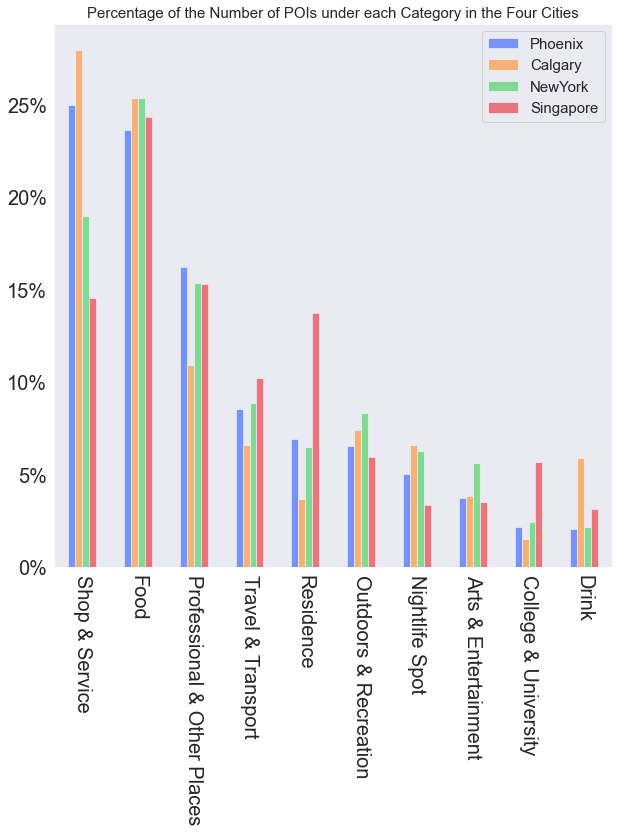

In [117]:
plt.rcParams['figure.figsize'] = (10, 10.0)   #调整图片大小

import seaborn as sns
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
#myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
#sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False      #显示负号

sns.set_palette(sns.color_palette('bright'))  #设置调色板
#pal_style = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']

data.plot.bar(stacked=False, alpha=0.5)      #绘制堆积柱状图

plt.xticks(fontsize=20, rotation=270)    #设置x和y轴刻度值的字体大小;rotation规定水平排列刻度文字。
plt.yticks(fontsize=20)    #设置y轴刻度值的字体大小

plt.legend(fontsize=15)    #设置legend刻度值的字体大小
plt.title('Percentage of the Number of POIs under each Category in the Four Cities',fontsize=15)

from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

#plt.savefig('./test2.jpg',transparent=True)
#plt.yticks(np.arange(0, 251, 50)) #设置y轴标签
plt.show()

In [118]:
phoenix_similar_vec = data['Phoenix'].tolist()
calgary_similar_vec = data['Calgary'].tolist()
newyork_similar_vec = data['NewYork'].tolist()
singapore_similar_vec = data['Singapore'].tolist()
phoenix_similar_vec

[0.25003449703325514,
 0.23651165999724025,
 0.1624120325651994,
 0.08541465433972678,
 0.06927004277632123,
 0.06582033945080723,
 0.050641644818545606,
 0.03725679591555126,
 0.021802125017248517,
 0.020836208086104594]

In [119]:
from scipy.spatial.distance import cosine
print('Phoenix VS Calgary',cosine(phoenix_similar_vec,calgary_similar_vec))
print('Phoenix VS NewYork',cosine(phoenix_similar_vec,newyork_similar_vec))
print('Phoenix VS Singapore',cosine(phoenix_similar_vec,singapore_similar_vec))
print('Calgary VS NewYork',cosine(calgary_similar_vec,newyork_similar_vec))
print('Calgary VS Singapore',cosine(calgary_similar_vec,singapore_similar_vec))
print('NewYork VS Singapore',cosine(newyork_similar_vec,singapore_similar_vec))
print('Singapore VS Singapore',cosine(singapore_similar_vec,singapore_similar_vec))

Phoenix VS Calgary 0.020766411506814353
Phoenix VS NewYork 0.014177365125524255
Phoenix VS Singapore 0.05451853787264638
Calgary VS NewYork 0.037703760347120197
Calgary VS Singapore 0.10585998825671106
NewYork VS Singapore 0.035344310457571027
Singapore VS Singapore 0


In [120]:
figure = pd.DataFrame(columns=('Phoenix','Calgary','NewYork','Singapore'))
figure = figure.append([{'Phoenix':1,'Calgary':cosine(phoenix_similar_vec,calgary_similar_vec),'NewYork':cosine(phoenix_similar_vec,newyork_similar_vec),'Singapore':cosine(phoenix_similar_vec,singapore_similar_vec)}], ignore_index=True)
figure = figure.append([{'Phoenix':cosine(phoenix_similar_vec,calgary_similar_vec),'Calgary':1,'NewYork':cosine(calgary_similar_vec,newyork_similar_vec),'Singapore':cosine(calgary_similar_vec,singapore_similar_vec)}], ignore_index=True)
figure = figure.append([{'Phoenix':cosine(phoenix_similar_vec,newyork_similar_vec),'Calgary':cosine(calgary_similar_vec,newyork_similar_vec),'NewYork':1,'Singapore':cosine(newyork_similar_vec,singapore_similar_vec)}], ignore_index=True)
figure = figure.append([{'Phoenix':cosine(phoenix_similar_vec,singapore_similar_vec),'Calgary':cosine(calgary_similar_vec,singapore_similar_vec),'NewYork':cosine(newyork_similar_vec,singapore_similar_vec),'Singapore':1}], ignore_index=True)
figure


,Phoenix,Calgary,NewYork,Singapore
0,1,0.020766,0.014177,0.054519
1,0.020766,1.000000,0.037704,0.105860
2,0.014177,0.037704,1.000000,0.035344
3,0.054519,0.105860,0.035344,1.000000


In [121]:
figure = figure.rename(columns={'Phoenix':'PHO','Calgary':'CAL','NewYork':'NYC','Singapore':'SIN'})
figure

,PHO,CAL,NYC,SIN
0,1,0.020766,0.014177,0.054519
1,0.020766,1.000000,0.037704,0.105860
2,0.014177,0.037704,1.000000,0.035344
3,0.054519,0.105860,0.035344,1.000000


In [122]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
colnm = data.columns.tolist()
mcorr = data[colnm].corr(method ='pearson')
mcorr = mcorr.rename(columns={'Phoenix':'PHO','Calgary':'CAL','NewYork':'NYC','Singapore':'SIN' })
mcorr.rename(index={'Phoenix':'PHO','Calgary':'CAL','NewYork':'NYC','Singapore':'SIN' },inplace=True)
mcorr

,PHO,CAL,NYC,SIN
PHO,1.000000,0.951145,0.966523,0.857267
CAL,0.951145,1.000000,0.912926,0.731304
NYC,0.966523,0.912926,1.000000,0.892050
SIN,0.857267,0.731304,0.892050,1.000000


<Figure size 720x576 with 0 Axes>

C:\Users\JINZEW~1\AppData\Local\Temp/ipykernel_11732/2295639096.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(mcorr, dtype=np.bool)



Figure 8: Pairwise Correlation Plot


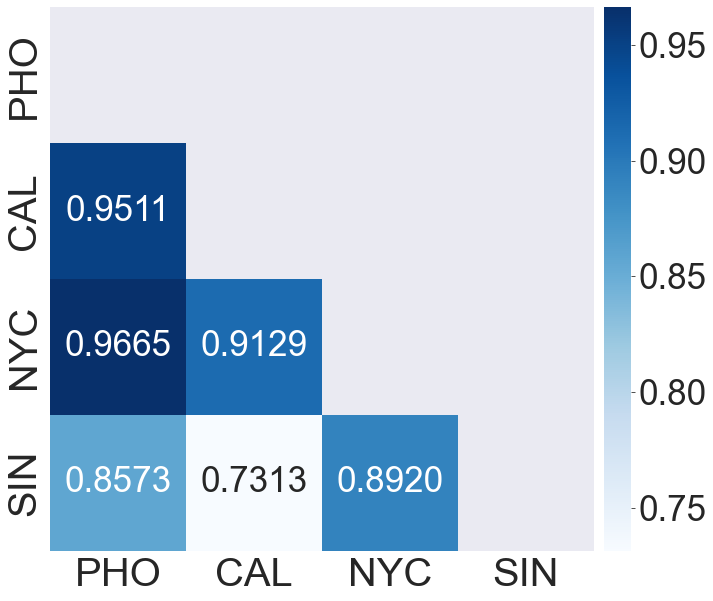

In [123]:
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (12,10))
g = sns.heatmap(mcorr, mask=mask, square=True, annot=True, fmt='0.4f', cmap="Blues" ,annot_kws={"fontsize":35}, cbar_kws={"shrink": 1,'pad':0.015})
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
print("\nFigure 8: Pairwise Correlation Plot") 
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=35)
heatmap_cate = g.get_figure()
heatmap_cate.savefig('correlation_cateogry.pdf', dpi = 600,bbox_inches = 'tight')

In [124]:
new_data = data
new_data

,Phoenix,Calgary,NewYork,Singapore
Shop & Service,0.250034,0.279788,0.189913,0.145705
Food,0.236512,0.253900,0.253555,0.243563
Professional & Other Places,0.162412,0.109525,0.153612,0.153388
Travel & Transport,0.085415,0.066047,0.089099,0.102515
Residence,0.069270,0.036840,0.064869,0.137429
Outdoors & Recreation,0.065820,0.074345,0.083517,0.059415
Nightlife Spot,0.050642,0.066047,0.062736,0.033608
Arts & Entertainment,0.037257,0.038832,0.056211,0.035507
College & University,0.021802,0.015599,0.024568,0.057220
Drink,0.020836,0.059077,0.021919,0.031650


In [125]:
new_data.rename(index={'Arts & Entertainment':'AE','College & University':'CU','Drink':'DR','Food':'FO','Nightlife Spot':'NS',
                'Outdoors & Recreation':'OR', 'Professional & Other Places':'PO', 'Residence':'RE', 'Shop & Service':'SS', 'Travel & Transport':'TT' },inplace=True)
new_data =new_data.rename(columns={'Phoenix':'PHO','Calgary':'CAL','NewYork':'NYC','Singapore':'SIN'})

In [126]:
new_data

,PHO,CAL,NYC,SIN
SS,0.250034,0.279788,0.189913,0.145705
FO,0.236512,0.253900,0.253555,0.243563
PO,0.162412,0.109525,0.153612,0.153388
TT,0.085415,0.066047,0.089099,0.102515
RE,0.069270,0.036840,0.064869,0.137429
OR,0.065820,0.074345,0.083517,0.059415
NS,0.050642,0.066047,0.062736,0.033608
AE,0.037257,0.038832,0.056211,0.035507
CU,0.021802,0.015599,0.024568,0.057220
DR,0.020836,0.059077,0.021919,0.031650


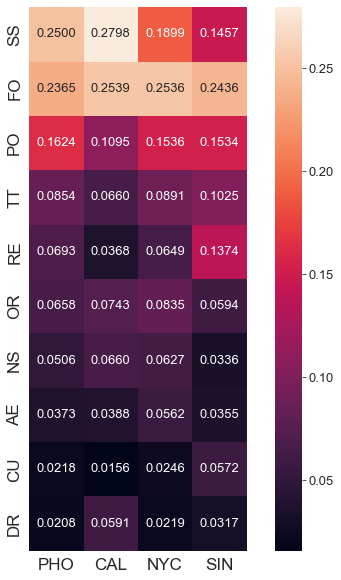

In [127]:
fig=sns.heatmap(new_data, square=True, annot=True, fmt='0.4f',annot_kws={"fontsize":13})
heatmap = fig.get_figure()
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
heatmap.savefig('heatmap.pdf', dpi = 400)

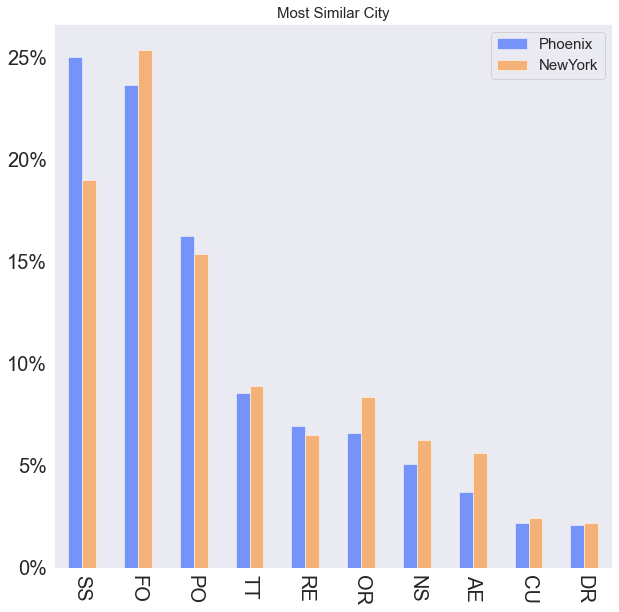

In [128]:
simi = data.drop(columns=['Calgary','Singapore'])
simi


plt.rcParams['figure.figsize'] = (10, 10.0)   #调整图片大小

import seaborn as sns
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
#myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
#sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False      #显示负号

sns.set_palette(sns.color_palette('bright'))  #设置调色板
#pal_style = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']

simi.plot.bar(stacked=False, alpha=0.5)      #绘制堆积柱状图

plt.xticks(fontsize=20, rotation=270)    #设置x和y轴刻度值的字体大小;rotation规定水平排列刻度文字。
plt.yticks(fontsize=20)    #设置y轴刻度值的字体大小

plt.legend(fontsize=15)    #设置legend刻度值的字体大小
plt.title('Most Similar City',fontsize=15)

from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

#plt.savefig('./test2.jpg',transparent=True)
#plt.yticks(np.arange(0, 251, 50)) #设置y轴标签
plt.show()

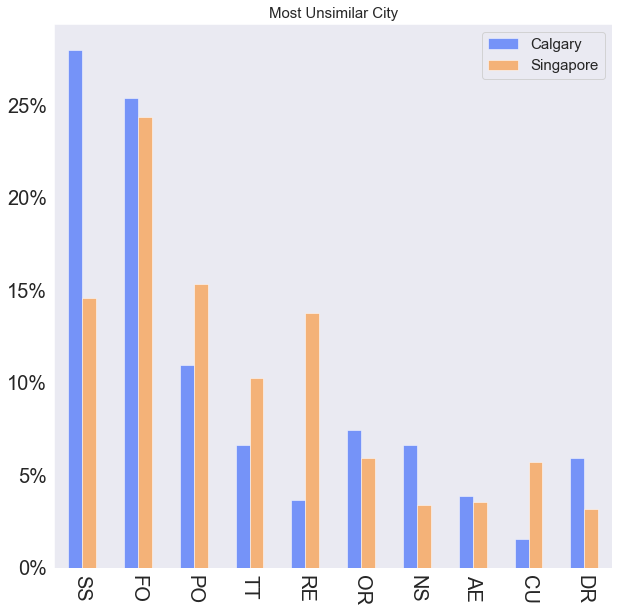

In [129]:
un_simi = data.drop(columns=['Phoenix','NewYork'])
un_simi

plt.rcParams['figure.figsize'] = (10, 10.0)   #调整图片大小
import seaborn as sns
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
#myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
#sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False      #显示负号

sns.set_palette(sns.color_palette('bright'))  #设置调色板
#pal_style = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']

un_simi.plot.bar(stacked=False, alpha=0.5)      #绘制堆积柱状图

plt.xticks(fontsize=20, rotation=270)    #设置x和y轴刻度值的字体大小;rotation规定水平排列刻度文字。
plt.yticks(fontsize=20)    #设置y轴刻度值的字体大小

plt.legend(fontsize=15)    #设置legend刻度值的字体大小
plt.title('Most Unsimilar City',fontsize=15)

from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

#plt.savefig('./test2.jpg',transparent=True)
#plt.yticks(np.arange(0, 251, 50)) #设置y轴标签
plt.show()

In [130]:
new_data

,PHO,CAL,NYC,SIN
SS,0.250034,0.279788,0.189913,0.145705
FO,0.236512,0.253900,0.253555,0.243563
PO,0.162412,0.109525,0.153612,0.153388
TT,0.085415,0.066047,0.089099,0.102515
RE,0.069270,0.036840,0.064869,0.137429
OR,0.065820,0.074345,0.083517,0.059415
NS,0.050642,0.066047,0.062736,0.033608
AE,0.037257,0.038832,0.056211,0.035507
CU,0.021802,0.015599,0.024568,0.057220
DR,0.020836,0.059077,0.021919,0.031650


In [131]:
pho_c = new_data['PHO'].tolist()
sin_c = new_data['SIN'].tolist()

In [132]:
from statistics import mean
mean(pho_c)

0.1

In [133]:
mean(sin_c)

0.1

In [134]:
aaa= (np.array(pho_c)-0.1).tolist()

In [135]:
bbb= (np.array(sin_c)-0.1).tolist()